In [1]:
import pandas as pd
# Load the dataset
data_path = 'fake_transactional_data_24.csv'
df = pd.read_csv(data_path)

# Display the first few rows to ensure it's loaded correctly
print(df.head())

# Data Inspection and Cleaning

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Confirm changes
print("\nData after cleaning:")
print(df.head())


   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  
Missing values in each column:
from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64

Data types of each column:
from_totally_fake_account        float64
monopoly_money_amount            float64
to_randomly_generated_account     objec

In [2]:
# Convert 'not_happened_yet_date' to datetime
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], format='%d/%m/%Y')

# Convert 'from_totally_fake_account' to int
df['from_totally_fake_account'] = df['from_totally_fake_account'].astype('int64')

# Check the data types again to confirm changes
print("\nData types after conversion:")
print(df.dtypes)

# Final data output
print("\nData after preprocessing:")
print(df.head())



Data types after conversion:
from_totally_fake_account                 int64
monopoly_money_amount                   float64
to_randomly_generated_account            object
not_happened_yet_date            datetime64[ns]
dtype: object

Data after preprocessing:
   from_totally_fake_account  monopoly_money_amount  \
0                      10371                   4.00   
1                      88339                   2.40   
2                      18555                   2.40   
3                      18555                   4.10   
4                      80792                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            2025-01-01  
1                         40544            2025-01-01  
2                         85149            2025-01-01  
3           HIPSTER_COFFEE_SHOP            2025-01-01  
4                         18555            2025-01-01  


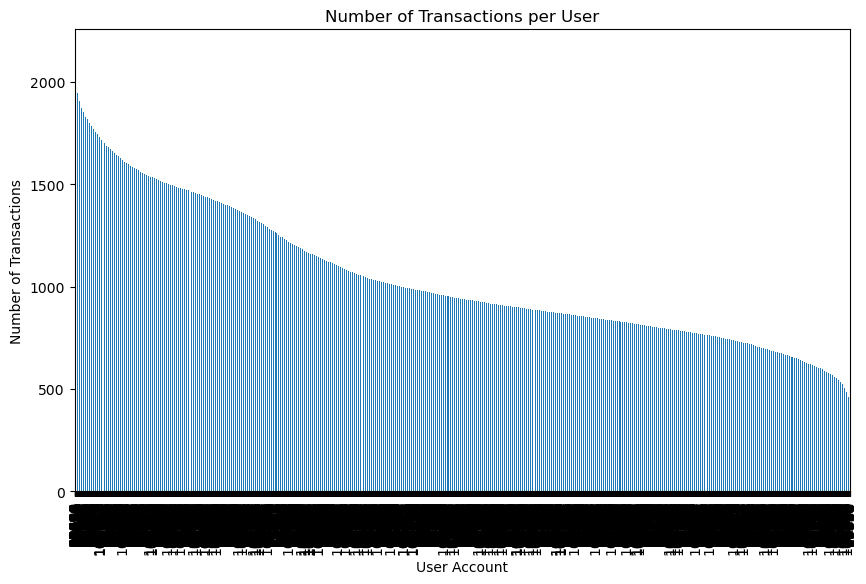

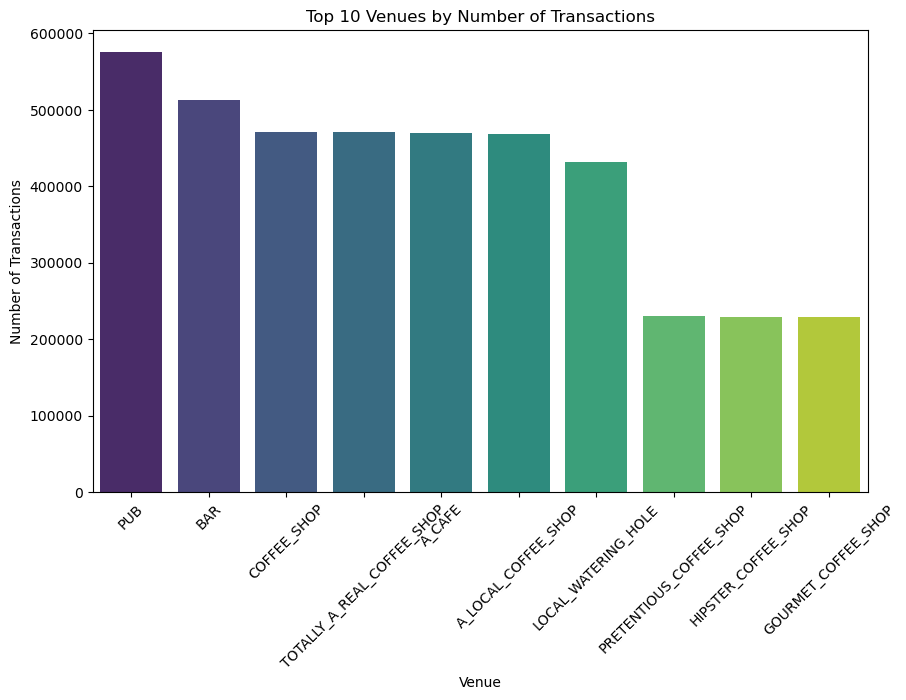

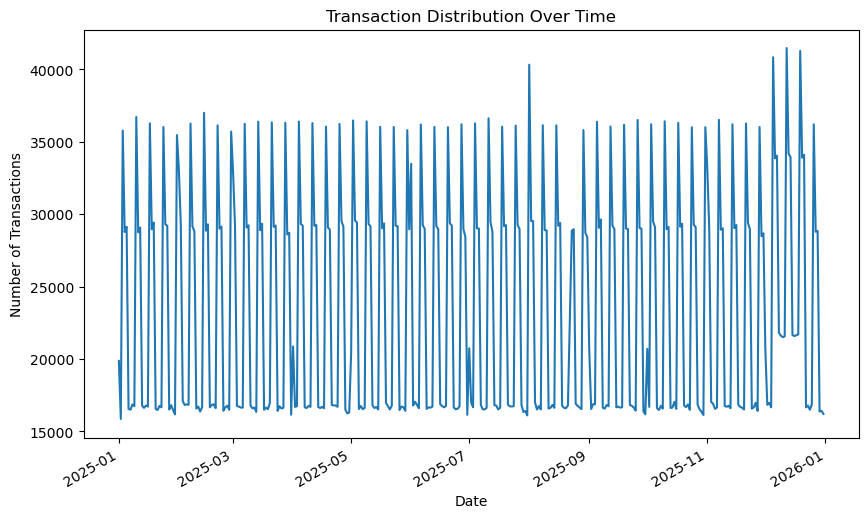

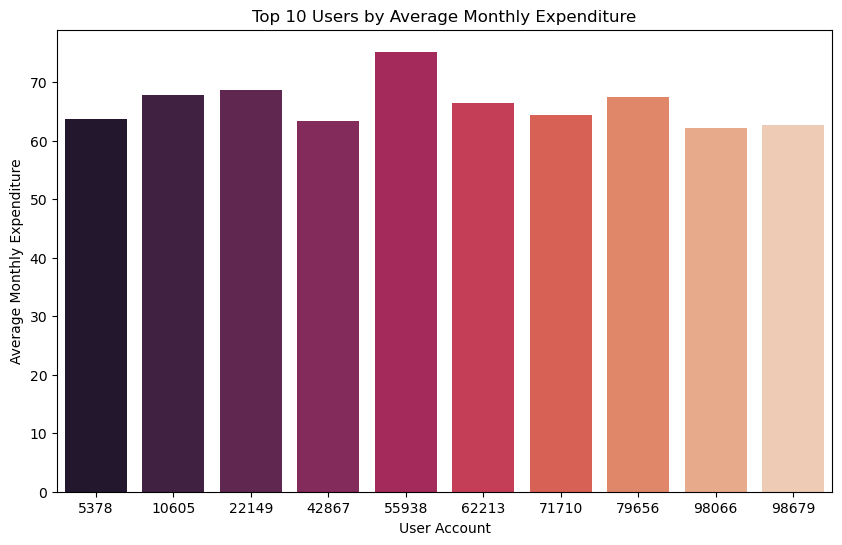

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the preprocessed dataframe

# 1. User Transaction Count
transaction_counts = df['from_totally_fake_account'].value_counts()
plt.figure(figsize=(10, 6))
transaction_counts.plot(kind='bar') # You may want to limit the number of users shown for clarity
plt.title('Number of Transactions per User')
plt.xlabel('User Account')
plt.ylabel('Number of Transactions')
plt.show()

# 2. Expenditure Count by Venue
venue_counts = df['to_randomly_generated_account'].value_counts().head(10) # Top 10 venues
plt.figure(figsize=(10, 6))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette="viridis")
plt.title('Top 10 Venues by Number of Transactions')
plt.xlabel('Venue')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.ylabel('Number of Transactions')
plt.show()

# 3. Time Distribution
# For this, ensure 'not_happened_yet_date' is in datetime format
df['not_happened_yet_date'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Transaction Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# 4. Average Monthly Expenditure per User Ranking
# First, extract month and year from 'not_happened_yet_date' for grouping
df['YearMonth'] = df['not_happened_yet_date'].dt.to_period('M')
monthly_expenditure = df.groupby(['from_totally_fake_account', 'YearMonth'])['monopoly_money_amount'].mean().reset_index()
average_expenditure = monthly_expenditure.groupby('from_totally_fake_account')['monopoly_money_amount'].mean().sort_values(ascending=False).head(10) # Top 10 users
plt.figure(figsize=(10, 6))
sns.barplot(x=average_expenditure.index, y=average_expenditure.values, palette="rocket")
plt.title('Top 10 Users by Average Monthly Expenditure')
plt.xlabel('User Account')
plt.ylabel('Average Monthly Expenditure')
plt.show()


In [4]:
# Assuming 'to_randomly_generated_account' is the column of interest
unique_accounts = df['to_randomly_generated_account'].unique()
unique_accounts_list = list(unique_accounts)
unique_accounts_list.sort()  # Sort the list for easier viewing

# Print or examine the list of unique accounts
print(unique_accounts_list)


['1000', '10000', '100000', '100002', '100019', '100021', '100023', '100027', '10004', '100053', '100056', '100060', '100064', '100065', '100083', '100086', '100094', '100098', '100105', '100115', '100120', '100126', '10013', '100137', '100138', '100140', '100142', '100144', '100153', '100155', '100159', '100163', '100165', '100166', '100169', '100171', '100175', '100186', '100197', '100198', '1002', '10021', '100214', '100217', '100219', '100223', '100224', '100228', '100233', '100250', '100261', '100264', '100273', '100274', '100275', '100280', '100282', '100295', '100297', '10030', '100300', '100301', '100302', '100305', '100324', '100338', '100348', '100368', '100373', '100376', '100385', '100401', '100420', '100423', '100445', '100446', '100455', '100466', '100472', '100478', '100480', '100483', '100488', '100489', '100493', '100517', '100537', '100541', '100546', '100568', '100569', '100570', '100572', '100573', '100583', '100593', '100595', '100599', '1006', '100600', '100608', 

In [ ]:
def categorize_venue(venue):
    # Define categories based on venue types
    food_retail = ['BUTCHER', 'BUTCHERS', 'GREENGROCER', 'FLORIST', 'TURKEY_FARM']
    specialty_retail = ['CHILDRENDS_SHOP', 'COMIC_BOOK_SHOP', 'JEWLLERY_SHOP', 'PET_SHOP', 'PET_TOY_SHOP', 'NERDY_BOOK_STORE', 'SECOND_HAND_BOOKSHOP', 'SCHOOL_SUPPLY_STORE', 'TOY_SHOP']
    leisure_recreation = ['GYM', 'KIDS_ACTIVITY_CENTRE']
    beverage_shops = ['PRETENTIOUS_COFFEE_SHOP', 'HIPSTER_COFFEE_SHOP', 'GOURMET_COFFEE_SHOP', 'TEA_SHOP', 'COFFEE_SHOP', 'TOTALLY_A_REAL_COFFEE_SHOP', 'TO_BEAN_OR_NOT_TO_BEAN', 'WE_HAVE_BEAN_WEIGHTING']
    fashion_decor = ['FASHIONABLE_SPORTSWARE_SHOP', 'FASHION_SHOP', 'TRAINER_SHOP', 'CLOTHES_SHOP', 'KIDS_CLOTHING_SHOP']
    home_electronics = ['HOME_IMPROVEMENT_STORE', 'ELECTRONICS_SHOP', 'TECH_SHOP', 'HIPSTER_ELECTRONICS_SHOP']
    
    # Classification logic
    if any(char.isdigit() for char in venue):
        return 'Transfer'
    elif venue in food_retail:
        return 'Food Retail'
    elif venue in specialty_retail:
        return 'Specialty Retail'
    elif venue in leisure_recreation:
        return 'Leisure and Recreation'
    elif venue in beverage_shops:
        return 'Beverage Shops'
    elif venue in fashion_decor:
        return 'Fashion and Decor'
    elif venue in home_electronics:
        return 'Home and Electronics'
    else:
        return 'Other'

# Apply the categorization function
df['venue_category'] = df['to_randomly_generated_account'].apply(categorize_venue)

# Create a new table showing the count of transactions for each account in each category
account_category_counts = df.groupby(['from_totally_fake_account', 'venue_category']).size().unstack(fill_value=0)

# Display the first few rows of the new table
print(account_category_counts.head())


In [ ]:
print(account_category_counts.head(20))

In [ ]:
# Save the new table as a CSV file
output_file_path = 'account_category_counts.csv'  # You can change this to your desired file path
account_category_counts.to_csv(output_file_path)

print(f"File saved as {output_file_path}")


# Wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_word_cloud(df, user_account):
    # Filter the DataFrame for the user account
    user_data = df[df['from_totally_fake_account'] == user_account]
    
    # Combine all venue names into a single string
    text = ' '.join(user_data['to_randomly_generated_account'])

    # Generate the word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)

    # Display the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

# generate_word_cloud(df, 12345)  # Replace 12345 with the user account number


In [ ]:
generate_word_cloud(df, 17761) 

In [ ]:
import seaborn as sns

# Assuming 'not_happened_yet_date' is already in datetime format
# Extracting the day of the week from the date (0=Monday, 6=Sunday)
df['day_of_week'] = df['not_happened_yet_date'].dt.dayofweek

# Counting transactions for each day of the week
day_of_week_transactions = df['day_of_week'].value_counts().sort_index()

# Mapping numerical days to actual names for better readability
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_transactions.index = days

# Plotting the transaction counts
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_transactions.index, y=day_of_week_transactions.values, palette="viridis")
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()
